In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
from graph_tool.all import *

## Load the wikipedia dataset

In [2]:
wikipedia_datadir = '/var/www/html/data/wikipedia'

In [3]:
wikipedia_dataset="%s/enwiki-07032015-linkgraph_wtitle.gt"%wikipedia_datadir

In [6]:
GG=load_graph(wikipedia_dataset)

## Statistics

#### Size

In [7]:
GG.num_vertices()

11571226

In [8]:
GG.num_edges()

174686648

#### Degree distribution

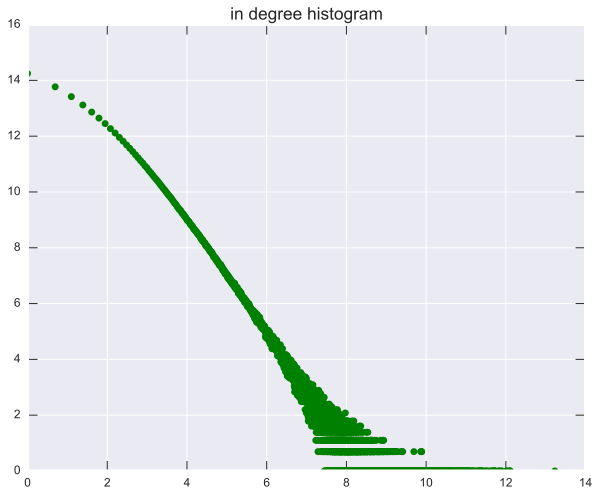

In [9]:
freqs, bins=graph_tool.stats.vertex_hist(GG, deg='in')
plt.plot(np.log(bins[:-1]), np.log(freqs), 'go')
plt.title("in degree histogram")


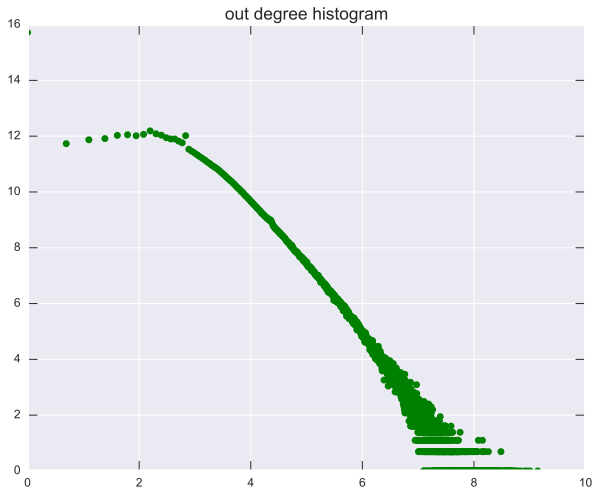

In [10]:
freqs, bins=graph_tool.stats.vertex_hist(GG, deg='out')
plt.plot(np.log(bins[:-1]), np.log(freqs), 'go')
plt.title("out degree histogram")

## Traverse the dataset

#### Access a wikipedia page with a title:

In [11]:
god_page=graph_tool.util.find_vertex(GG, GG.vertex_properties['title'], 'God')[0]
god_page

<Vertex object with index '2001504' at 0x7f062bfeac00>

In [12]:
python_page=graph_tool.util.find_vertex(GG, GG.vertex_properties['title'], 'Python')[0]
python_page

<Vertex object with index '7293737' at 0x7f062bfeacf0>

#### Explore the neighbourhood of a page:

In [13]:
for nei in python_page.out_neighbours():
    print(GG.vertex_properties['title'][nei])

Python (genus)
Pythonidae
Python (mythology)
Python of Aenus
Python of Byzantium
Python of Catana
Python (programming language)
CPython
CMU Common Lisp
PERQ
Python (film)
Python II
Monty Python
Python (Busch Gardens Tampa Bay)
Python (Coney Island)
Python (Efteling)
Colt Python
Python missile
Armstrong Siddeley Python
Python Automobile
Pyton


#### Find out shortest path between two wikipedia articles

In [14]:
v=GG.vertex(np.random.randint(0, GG.num_vertices()))

In [15]:
GG.vertex_properties['title'][v]

'Political alliances of Peoples Temple'

In [16]:
god=graph_tool.util.find_vertex(GG, GG.vertex_properties['title'], 'God')[0]

In [17]:
vertices, edges=graph_tool.topology.shortest_path(GG, source=v, target=god)

In [18]:
for v in vertices:
    print(GG.vertex_properties['title'][v], end='\t')

Political alliances of Peoples Temple	Peoples Temple in San Francisco	Peoples Temple	New Thought	God	